# Task-2

## Prediction Using Unsupervised ML

### Author: Tanaya Modak

#### Problem Statement: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. 

### Import the required libraries, load and read the data

In [11]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")

from sklearn.cluster import KMeans

In [12]:
#Load and read data(To download this Dataset : https://bit.ly/3kXTdox)
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Inspect the Data

In [13]:
df.shape

(150, 6)

In [14]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [16]:
df["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [17]:
#Now, to get the clusters through unsupervised learning, we need to delete the 'species' label from the data. 
#Also, Id olumn is unnecessary data.
column = ["Id", "Species"]
df.drop(columns = column, axis = 1, inplace = True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Visualise the Data

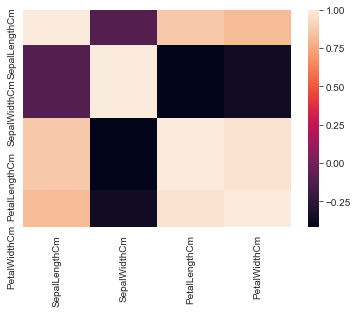

In [18]:
#Let's see the correlation of data through plot
corr = df.corr()
sns.heatmap(corr)
plt.show()

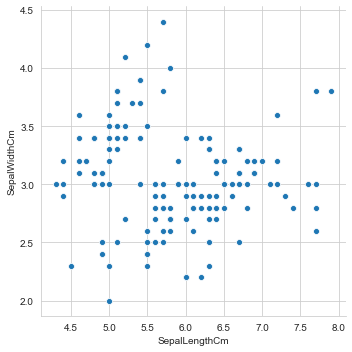

In [19]:
#Sepal Length vs Sepal Width
sns.relplot(x = "SepalLengthCm",
            y = "SepalWidthCm", 
            data = df,
            kind = "scatter")

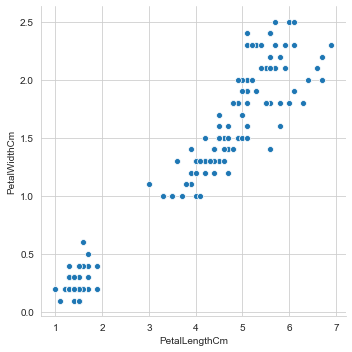

In [20]:
#Petal Length vs Petal Width
sns.relplot(x = "PetalLengthCm",
            y = "PetalWidthCm", 
            data = df,
            kind = "scatter")

### Using Elbow Method to get value of K

In [46]:
df1 = df.iloc[:, [0, 1, 2, 3]].values

In [47]:
#Let's use the elbow method to get the value of K(number of clusters)
scores = []

for center in range(1, 11):
    #Instantiate the model with centers ranging from 1 to 10
    kmeans = KMeans(center, random_state = 42)
    
    #Fit the model to data
    model = kmeans.fit(df1)
    
    #Get average distance from centroids
    scores.append(model.inertia_)

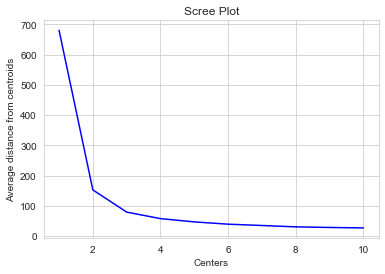

In [48]:
#Let's plot the results of Elbow Method
centers = list(range(1, 11))

plt.plot(centers, scores)
plt.title("Scree Plot")
plt.xlabel("Centers")
plt.ylabel("Average distance from centroids")
plt.show()

#### From this plot, we can say that, the value of K should be 2 or 3. But as we can see, at K=2, by adding new cluster, we will create substancial decrease in the average distance. So, the K should be 3, and now,  by adding a new cluster won't impact the average distance much. Hence, the optimum value for clusters is 3.

### Applying KMeans to data with K = 3

In [55]:
model = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 42)
predict = model.fit_predict(df1)

### Visualizing the clusters

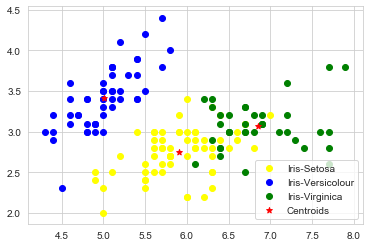

In [78]:
custom_palette = ["yellow", "blue", "green"]
sns.set_palette(custom_palette)

plt.scatter(df1[predict == 0, 0], df1[predict == 0, 1], label = "Iris-Setosa")
plt.scatter(df1[predict == 1, 0], df1[predict == 1, 1], label = "Iris-Versicolour")
plt.scatter(df1[predict == 2, 0], df1[predict == 2, 1], label = "Iris-Virginica")

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], c = "red", marker = '*', label = 'Centroids')
plt.legend()